1. Principle Component Analysis (PCA) for Dimensionality Reduction


Original shape: (1797, 64)
Reduced shape: (1797, 2)


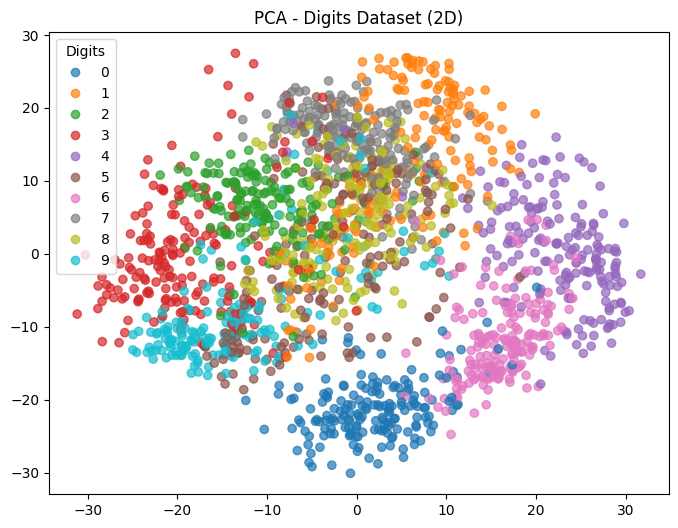

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

# Load digits dataset (64 features)
digits = load_digits()
X = digits.data
y = digits.target

print("Original shape:", X.shape)

# Apply PCA - reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Reduced shape:", X_pca.shape)

# Plot
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="tab10", alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title("PCA - Digits Dataset (2D)")
plt.show()


2. Classification using Multilayer Perceptron (MLP)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Predictions
y_pred = mlp.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9805555555555555
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      1.00      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



3. Evaluating ML Algorithms with Balanced and Unbalanced Datasets

In [6]:
from sklearn.datasets import make_classification
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Balanced dataset
X_bal, y_bal = make_classification(n_samples=2000, n_features=20,
                                   n_classes=2, weights=[0.5,0.5], random_state=42)

# Unbalanced dataset (90:10 ratio)
X_unbal, y_unbal = make_classification(n_samples=2000, n_features=20,
                                       n_classes=2, weights=[0.9,0.1], random_state=42)

# Train Logistic Regression on both
clf = LogisticRegression(max_iter=1000)

print("\n--- Balanced Dataset ---")
clf.fit(X_bal, y_bal)
y_pred = clf.predict(X_bal)
print(classification_report(y_bal, y_pred))

print("\n--- Unbalanced Dataset ---")
clf.fit(X_unbal, y_unbal)
y_pred = clf.predict(X_unbal)
print(classification_report(y_unbal, y_pred))



--- Balanced Dataset ---
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1002
           1       0.88      0.90      0.89       998

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000


--- Unbalanced Dataset ---
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1793
           1       0.78      0.63      0.70       207

    accuracy                           0.94      2000
   macro avg       0.87      0.81      0.83      2000
weighted avg       0.94      0.94      0.94      2000

